In [1]:
import pickle
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [21]:
pickle_path = "../../../all_data/relation_extraction/data/relation_vec_avg_df.pkl"
df = pickle.load(open(pickle_path, "rb"))

In [22]:
features = df.columns[1:]
relation = df.columns[0]

In [4]:
# to get random subset of data
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

## PCA

In [5]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[features].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: 0.2091722555529938


[(-0.015, 0.02)]

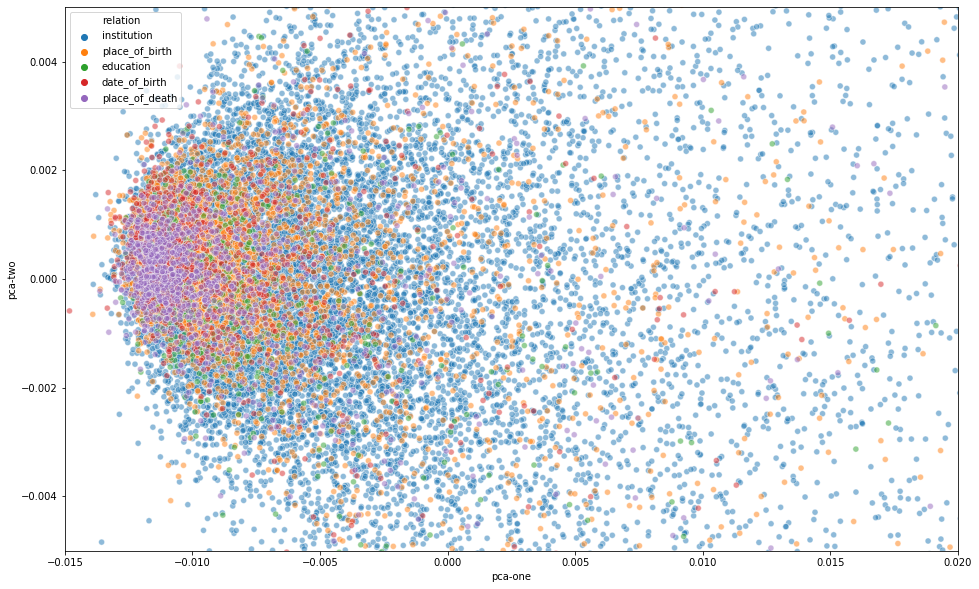

In [9]:
ax = plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="relation",
    data=df,
    legend="full",
    alpha=0.5
)
ax.set(ylim=(-0.005,0.005))
ax.set(xlim=(-0.015,0.02))

In [10]:
list_c = []
for index, row in df.iterrows():
    if row['relation'] in "institution":
        list_c.append("#fc0703") #red
    if row['relation'] in "place_of_birth":
        list_c.append("#f4fc03") #yellow
    if row['relation'] in "date_of_birth":
        list_c.append("#03fc20") #green
    if row['relation'] in "place_of_death":
        list_c.append("#1403fc") #blue
    if row['relation'] in "education":
        list_c.append("#df03fc") #pink

In [11]:
df['color'] = list_c

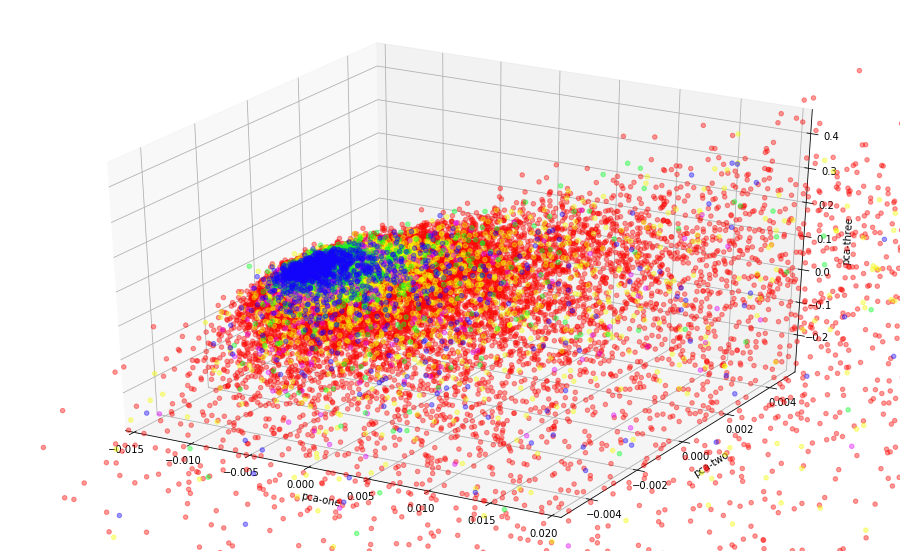

In [13]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')

# type(ax)
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["color"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.set(ylim=(-0.005,0.005))
ax.set(xlim=(-0.015,0.02))
plt.show()

## t-SNE

In [16]:
import time
# N = 10000

# df_subset = df.loc[rndperm[:N],:].copy()

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.drop(['relation'], axis=1))

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 25748 samples in 0.394s...
[t-SNE] Computed neighbors for 25748 samples in 171.552s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25748
[t-SNE] Computed conditional probabilities for sample 2000 / 25748
[t-SNE] Computed conditional probabilities for sample 3000 / 25748
[t-SNE] Computed conditional probabilities for sample 4000 / 25748
[t-SNE] Computed conditional probabilities for sample 5000 / 25748
[t-SNE] Computed conditional probabilities for sample 6000 / 25748
[t-SNE] Computed conditional probabilities for sample 7000 / 25748
[t-SNE] Computed conditional probabilities for sample 8000 / 25748
[t-SNE] Computed conditional probabilities for sample 9000 / 25748
[t-SNE] Computed conditional probabilities for sample 10000 / 25748
[t-SNE] Computed conditional probabilities for sample 11000 / 25748
[t-SNE] Computed conditional probabilities for sample 12000 / 25748
[t-SNE] Computed conditional probabilities for 

[(-4, 4)]

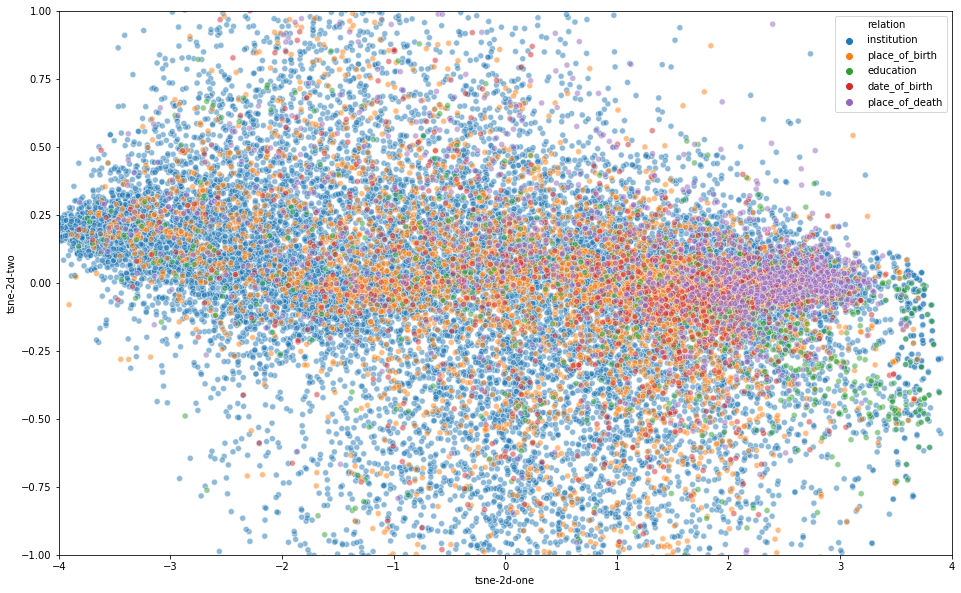

In [20]:
# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))

ax = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="relation",
#     palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.5
)
ax.set(ylim=(-1,1))
ax.set(xlim=(-4,4))

## t-SNE with Dimensionality Reduction

In [23]:
pca_70 = PCA(n_components=70)
pca_result = pca_70.fit_transform(df[features].values)

print('Cumulative explained variation for 50 principle components: {}'.format(np.sum(pca_70.explained_variance_ratio_)))

Cumulative explained variation for 50 principle components: 0.7771940224563884


In [24]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 25748 samples in 0.153s...
[t-SNE] Computed neighbors for 25748 samples in 90.589s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25748
[t-SNE] Computed conditional probabilities for sample 2000 / 25748
[t-SNE] Computed conditional probabilities for sample 3000 / 25748
[t-SNE] Computed conditional probabilities for sample 4000 / 25748
[t-SNE] Computed conditional probabilities for sample 5000 / 25748
[t-SNE] Computed conditional probabilities for sample 6000 / 25748
[t-SNE] Computed conditional probabilities for sample 7000 / 25748
[t-SNE] Computed conditional probabilities for sample 8000 / 25748
[t-SNE] Computed conditional probabilities for sample 9000 / 25748
[t-SNE] Computed conditional probabilities for sample 10000 / 25748
[t-SNE] Computed conditional probabilities for sample 11000 / 25748
[t-SNE] Computed conditional probabilities for sample 12000 / 25748
[t-SNE] Computed conditional probabilities for s

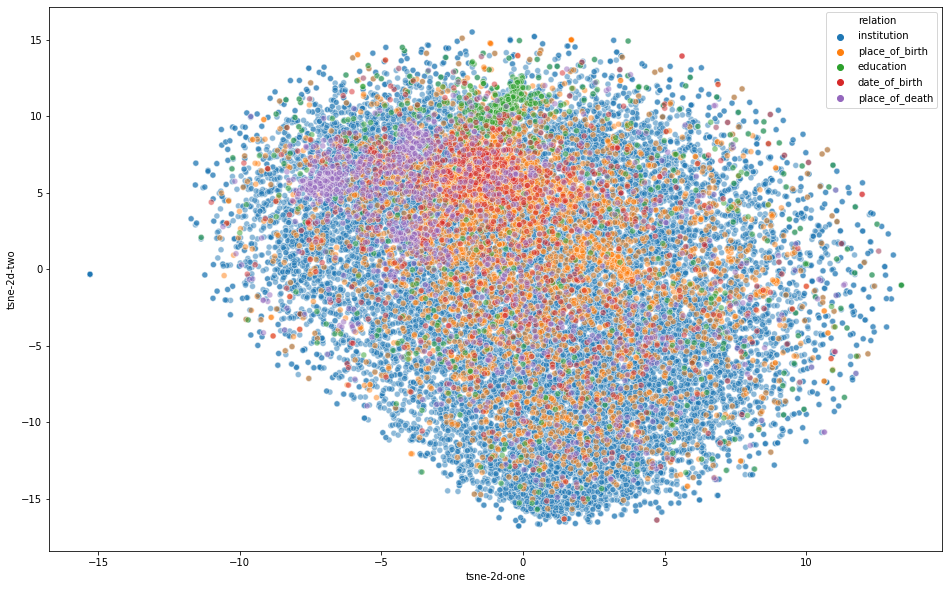

In [25]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="relation",
#     palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.5
)